<a href="https://colab.research.google.com/github/SergioMoraa/Solucion_TAM2/blob/main/Parcial2TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 **Parcial 2: Teoría de Aprendizaje de Máquina - 2025-1**  
**Profesor:** Andrés Marino Álvarez Meza, Ph.D.  
**🏛️ Departamento:** Ingeniería Eléctrica, Electrónica y Computación  
**🌍 Universidad Nacional de Colombia - Sede Manizales**  

## 📋 Instrucciones  

Para recibir **crédito total** por sus respuestas, estas deben:  
- Estar **claramente justificadas**.  
- Ilustrar **procedimientos y razonamientos** (paso a paso) de forma:  
  - **Concreta**.  
  - **Clara**.  
  - **Completa**.  

### 📅 Entrega  
- **Fecha límite**: 17 de julio de 2025, 23:59.  
- **Envío**:  
  - **Correo electrónico**: amalvarezme@unal.edu.co.  
  - **Formato**: Link de GitHub con:  
    - Componentes teóricos en PDF (solución a mano).  
    - Componentes de simulación:  
     Cuadernos de Python (notebooks).  
     Dashboard interactivo (según especificaciones).  
  - **Alternativa**: Si hay problemas con GitHub, enviar archivos en `.zip`.  

### 🔧 Requisitos técnicos  
- **Dashboard**:  
  - Debe ser **intuitivo** y funcional.  
  - Incluir enlace a video de YouTube (3-5 min) explicativo (segun el punto e ).  
- **Códigos**:  
  - **Comentados** en celdas correspondientes.  
  - **Explicados** en celdas de texto (Markdown).  
  - Sin comentarios → **no evaluados**.  

### 👥 Grupos  
- Máximo **3 personas** por grupo.  
- **Asunto del correo**:  Parcial 2
 TAM2025-1:
 - Mateo Duque Gaviria
 - Juan Esteban Villlada
 - Sergio Mora


## ❓ Preguntas

### **a) Modelos y problemas de optimización**

Consulte y presente el **modelo** y **problema de optimización** de los siguientes algoritmos de aprendizaje de máquina:  

- **PCA** (Análisis de Componentes Principales)  
- **UMAP** (Uniform Manifold Approximation and Projection)   
- **Naive Bayes (GaussianNB)**  
- **SGDClassifier** (Descenso de Gradiente Estocástico)  
- **LogisticRegression**  
- **LinearDiscriminantAnalysis**  
- **KNeighborsClassifier**  
- **SVC** (Máquinas de Vectores de Soporte)  
- **RandomForestClassifier**  
- **GaussianProcessClassifier**  
- **Clasificadores basados en Deep Learning**  

#**En la carpeta de archivos, se descargo un pdf llamado : archivo_descargado.pdf en el cual esta la solucion matematica del punto 1**

In [ ]:
import requests

def descargar_pdf(url, nombre_archivo):
    respuesta = requests.get(url)
    with open(nombre_archivo, 'wb') as f:
        f.write(respuesta.content)
    print(f"Archivo descargado: {nombre_archivo}")

# Ejemplo de uso
url_pdf = "hhttps://github.com/SergioMoraa/Solucion_TAM2/raw/main/Parcial_2_punto_a.pdf"
nombre_local = "archivo_descargado.pdf"
descargar_pdf(url_pdf, nombre_local)

Archivo descargado: archivo_descargado.pdf
Archivo descargado: archivo_descargado.pdf



### **b) Proyección dimensional con USPS**  
Utilizando la base de datos **USPS**, proyecte el conjunto de datos en un espacio de menor dimensión empleando los métodos **PCA** y **UMAP**.  

**Requisitos**:  
- Representar gráficamente el espacio proyectado (usar colores según etiquetas).  
- Incluir imágenes representativas superpuestas en la proyección.  
- Analice las diferencias entre los espacios obte
nidos y explore como varıa la representacion al modificar el
 numero de vecinos en UMAP, discutiendo el impacto de este
 parametro en la estructura del espacio latente.


#**Descarga de la base de datos**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bistaumanga/usps-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/usps-dataset


# **Instalación y carga de datos**

In [ ]:
# Instalamos UMAP si aún no está
!pip install umap-learn --quiet

In [ ]:
# --- 1. Instalación de Librerías (si no están ya en Colab) ---
!pip install umap-learn ipywidgets
!pip install Pillow

In [ ]:
!pip install scipy # Necesario para leer archivos .mat

In [ ]:
#CÁLCULO Y ALMACENAMIENTO DE RESULTADOS
# Ejecuta esta celda una sola vez para pre-calcular todo.
# ===================================================================



# Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from io import BytesIO

import base64

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from umap import UMAP
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import VotingClassifier, StackingClassifier

import umap.umap_
from PIL import Image
import matplotlib.patheffects as pe



# Ipywidgets para el dashboard
import ipywidgets as widgets
from IPython.display import display, clear_output

#from sklearn.datasets import load_digits

# **Cargar y preparar los datos USPS**

In [ ]:
# USPS está disponible en OpenML con ID = 41021
usps = fetch_openml('USPS', version=1)
X = usps['data']
y = usps['target'].astype(int)  # Convertimos las etiquetas a enteros

# Escalamos los datos (importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- DICCIONARIOS PARA ALMACENAR RESULTADOS ---
embeddings = {}
model_results = {}

print("Forma de los datos:", X.shape)


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(


Forma de los datos: (9298, 256)


# **Reducción de dimensionalidad con PCA**

In [ ]:
# Aplicamos PCA a 2 dimensiones
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)
embeddings['PCA'] = X_pca

#X_pca = pca.fit_transform(X_scaled)

# Mostramos la varianza explicada
print("Varianza explicada por PCA:", pca.explained_variance_ratio_)


Varianza explicada por PCA: [0.21822908 0.10347107]


# **Visualización PCA con etiquetas y muestras**

In [ ]:
# Función para agregar imágenes al gráfico
def plot_embedding_with_images(X, y, images, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', alpha=0.6)
    ax.set_title(title)
    ax.axis('off')

    # Mostrar 1 imagen por clase
    shown_labels = []
    for i in range(len(X)):
        if y[i] in shown_labels:
            continue
        imagebox = OffsetImage(images[i].reshape(16, 16), zoom=0.8, cmap='gray')
        ab = AnnotationBbox(imagebox, X[i], frameon=False)
        ax.add_artist(ab)
        shown_labels.append(y[i])
    plt.colorbar(scatter, ax=ax, label="Etiqueta")
    plt.show()

# Llamamos a la función para PCA
plot_embedding_with_images(X_pca, y, usps['data'].values, "Proyección PCA - USPS")


# **Reducción con UMAP (n_neighbors = 15)**

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


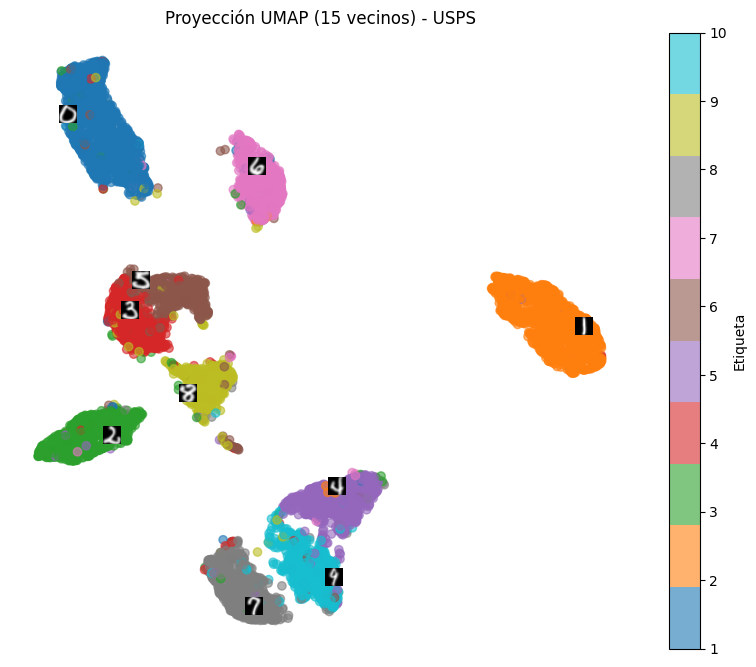

In [ ]:
# UMAP con vecinos por defecto (15)
import umap.umap_ as umap

n = 15
umap_model = umap.UMAP(n_neighbors=15, random_state=42)

X_umap = umap_model.fit_transform(X_scaled)
embeddings[f'UMAP (vecinos={n})'] = X_umap

#X_umap = umap_model.fit_transform(X_scaled)


plot_embedding_with_images(X_umap, y, usps['data'].values, "Proyección UMAP (15 vecinos) - USPS")

# **Comparación con diferentes n_neighbors en UMAP**

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


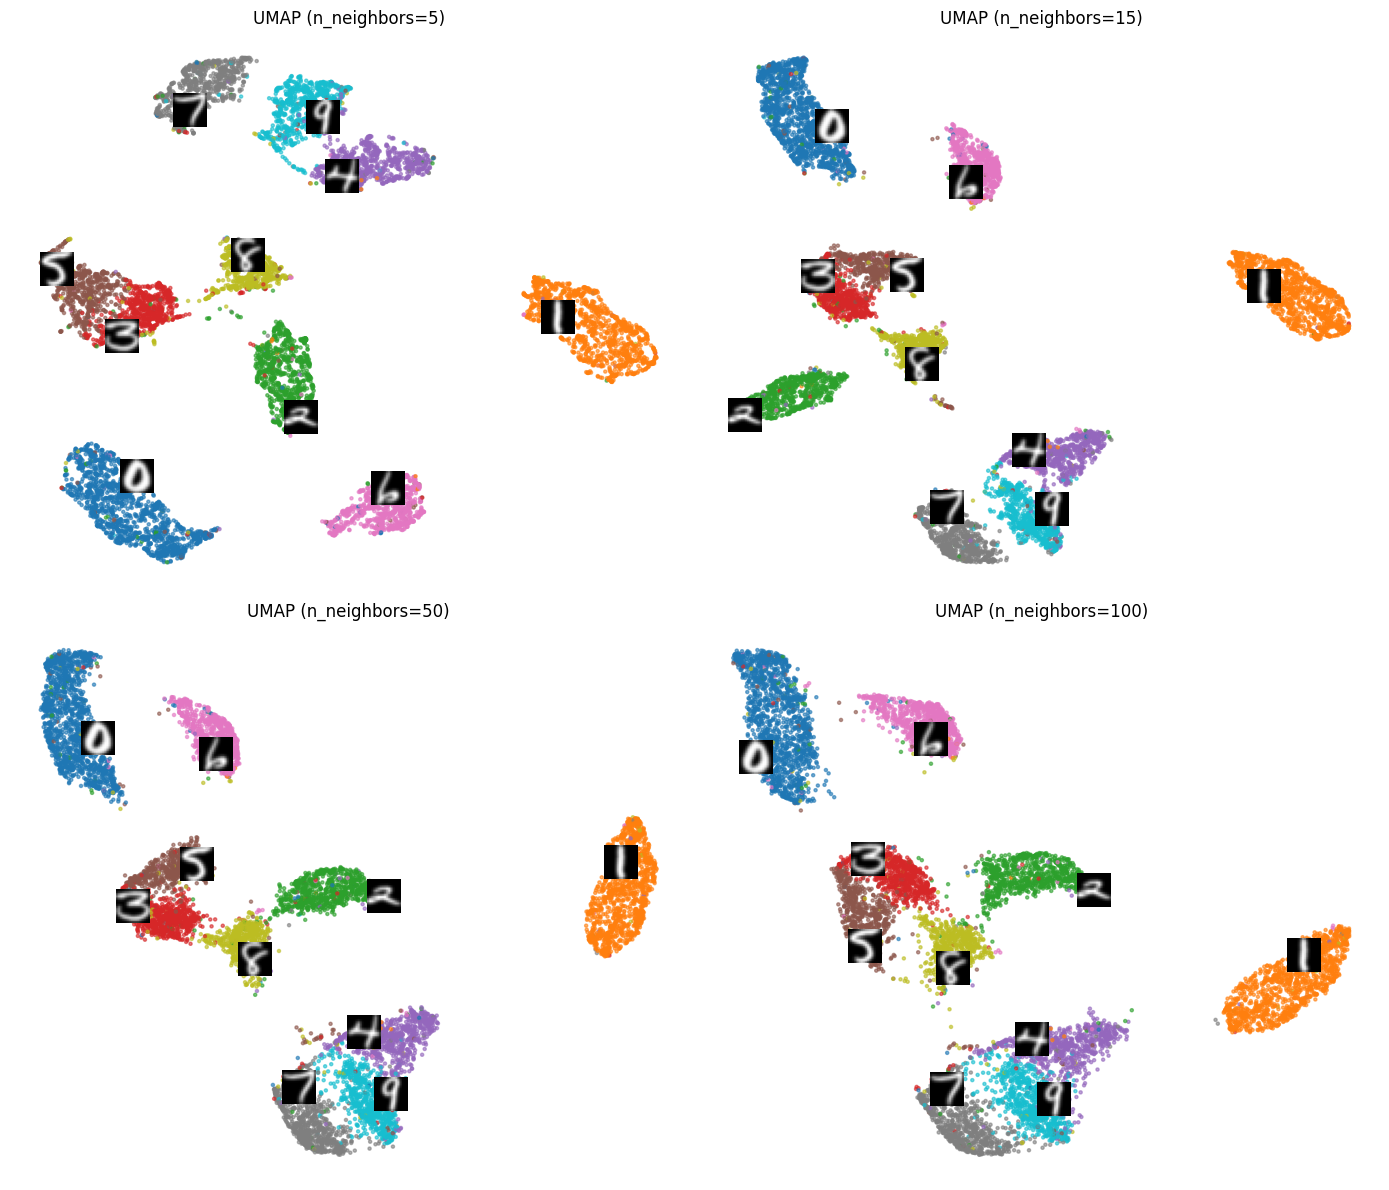

In [ ]:
def plot_latent_space(ax, embedding, labels, title, raw_images):
    """Visualiza un espacio latente en 2D con una muestra de imágenes por clase.

    Args:
        ax (matplotlib.axes.Axes): Ejes de Matplotlib sobre los cuales graficar.
        embedding (ndarray): Representación 2D obtenida con PCA o UMAP.
        labels (ndarray): Etiquetas de clase correspondientes a cada punto.
        title (str): Título del gráfico.
        raw_images (ndarray): Imágenes originales en formato plano (16x16 píxeles).

    Returns:
        None
    """
    ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', s=5, alpha=0.6)
    ax.set_title(title)
    ax.axis('off')

    # Add a representative image for each class
    for digit in np.unique(labels):
        idx = np.where(labels == digit)[0]
        if len(idx) == 0:
            continue
        # Pick an index near the center of the embedded cluster for that digit
        # You might need to adjust this to find a good representative
        i = idx[len(idx) // 2]
        image = raw_images[i].reshape(16, 16)  # USPS images are 16x16
        im = OffsetImage(image, cmap='gray', zoom=1.5)
        ab = AnnotationBbox(im, (embedding[i, 0], embedding[i, 1]), frameon=False, pad=0.0)
        ax.add_artist(ab)

# ---
# Generating the plots
# ---

# Define the n_neighbors values you want to test
n_neighbors_values = [5, 15, 50, 100]

# Create a dictionary to store UMAP embeddings for different n_neighbors
# umap_embeddings = {}
# for n in n_neighbors_values:
#     umap_model = umap.UMAP(n_neighbors=n, random_state=42)
#     umap_embeddings[n] = umap_model.fit_transform(X_scaled)

    # UMAP con diferentes vecinos
for n in n_neighbors_values:
    umap_model = umap.UMAP(n_neighbors=n, n_components=2, random_state=42)
    embeddings[f'UMAP (vecinos={n})'] = umap_model.fit_transform(X_scaled)

# Create the figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot UMAP embeddings for different n_neighbors
# We'll map the n_neighbors values to the subplot positions
# plot_latent_space(axes[0], umap_embeddings[n_neighbors_values[0]], y, f"UMAP (n_neighbors={n_neighbors_values[0]})", usps['data'].values)
# plot_latent_space(axes[1], umap_embeddings[n_neighbors_values[1]], y, f"UMAP (n_neighbors={n_neighbors_values[1]})", usps['data'].values)
# plot_latent_space(axes[2], umap_embeddings[n_neighbors_values[2]], y, f"UMAP (n_neighbors={n_neighbors_values[2]})", usps['data'].values)
# plot_latent_space(axes[3], umap_embeddings[n_neighbors_values[3]], y, f"UMAP (n_neighbors={n_neighbors_values[3]})", usps['data'].values)

plot_latent_space(axes[0], embeddings[f'UMAP (vecinos={n_neighbors_values[0]})'], y, f"UMAP (n_neighbors={n_neighbors_values[0]})", usps['data'].values)
plot_latent_space(axes[1], embeddings[f'UMAP (vecinos={n_neighbors_values[1]})'], y, f"UMAP (n_neighbors={n_neighbors_values[1]})", usps['data'].values)
plot_latent_space(axes[2], embeddings[f'UMAP (vecinos={n_neighbors_values[2]})'], y, f"UMAP (n_neighbors={n_neighbors_values[2]})", usps['data'].values)
plot_latent_space(axes[3], embeddings[f'UMAP (vecinos={n_neighbors_values[3]})'], y, f"UMAP (n_neighbors={n_neighbors_values[3]})", usps['data'].values)

plt.tight_layout()
plt.show()

# **Discusion**
- ## **Comparación PCA vs UMAP sobre USPS**

 - **PCA** proyecta los datos en direcciones lineales que maximizan la varianza, resultando en una distribución más difusa y "extendida", especialmente porque no tiene en cuenta las etiquetas ni la estructura no lineal.
 - **UMAP** logra una proyección más agrupada por clases, ya que preserva mejor la topología del espacio de alta dimensión.

- ###  **Efecto del número de vecinos (`n_neighbors`) en UMAP:**
 - **Vecinos pequeños (e.g., 5):** Más separación entre clases, pero posible sobreajuste (clusters muy apretados).
 - **Vecinos grandes (e.g., 100):** Mejora la continuidad global del espacio, pero reduce la separación entre clases.

Esto ilustra cómo `n_neighbors` regula el equilibrio entre la estructura **local** y **global** del espacio latente.


### **c) Clasificación**  
A partir de los resultados de proyección:  
- Seleccionar **tres métodos de clasificación** del punto (a).  
   - **Incluir al menos 1 modelo de aprendizaje profundo (Deep lerning)**.  
- Justificar:  
   - Elección de hiperparámetros.  
   - Estrategias de entrenamiento.  
   - Aspectos relevantes del modelado.  
- Presentar:  
   - Reportes de desempeño.  
   - Curvas ROC correspondientes.  



## **Clasificación sobre USPS usando PCA/UMAP**

A continuación, se comparan tres modelos de clasificación entrenados sobre los datos USPS proyectados con UMAP.  
Se entrenaron y evaluaron los siguientes modelos:
- **SVC (Support Vector Classifier)**
- **Red Neuronal MLP (Multilayer Perceptron)**  
- **Regresión Logística**  

Se evaluarán mediante **matriz de confusión**, **reporte de desempeño** y **curvas ROC multiclase**.  
Se justifica la elección de hiperparámetros y se discute su impacto en el rendimiento.


In [ ]:
# Load the USPS dataset
#X, y = load_digits(return_X_y=True)

# Apply UMAP projection
#umap_model = UMAP(n_components=2, random_state=42)
#X_umap = umap_model.fit_transform(X_scaled)

print("Shape of X_umap:", X_umap.shape)

Shape of X_umap: (9298, 2)


# **Preparar datos (usando la proyección UMAP)**

In [ ]:
# Dividimos la proyección UMAP en conjunto de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=42, stratify=y)

# Usamos un embedding fijo para entrenar (ej. UMAP con 15 vecinos)
X_train, X_test, y_train, y_test = train_test_split(
    embeddings['UMAP (vecinos=15)'], y, test_size=0.2, random_state=42, stratify=y
)

print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)


Forma de X_train: (7438, 2)
Forma de y_train: (7438,)


## **Justificación de modelos y estrategias de entrenamiento**

- **LogisticRegression:** Modelo base lineal con buena eficiencia en datos bien separados. Se usa con `solver='lbfgs'` y regularización L2.

- **SVC (Support Vector Classifier):** Útil para manejar fronteras no lineales. Usamos kernel RBF y `C=10` para regularización fuerte, debido a la separación que UMAP proporciona.

- **MLPClassifier (Red neuronal):** Modelo de aprendizaje profundo. Usamos una arquitectura simple con 2 capas ocultas (`(100, 50)`), activación ReLU y optimizador Adam.  
   Se entrena por 30 épocas con early stopping habilitado para prevenir sobreajuste.


# **Entrenamiento de los modelos**

In [ ]:
# Definición de modelos

models_to_train = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "SVC (RBF)": SVC(kernel='rbf', probability=True, C=10, random_state=42),
    "Red Neuronal (MLP)": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, early_stopping=True, random_state=42),
    "Ensamble (Voting)": VotingClassifier(
        estimators=[('svc', SVC(kernel='rbf', probability=True, C=10, random_state=42)), ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42))],
        voting='soft'
    ),
    "Ensamble (Stacking)": StackingClassifier(
        estimators=[('svc', SVC(kernel='rbf', probability=True, C=10, random_state=42)), ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42))],
        final_estimator=LogisticRegression(max_iter=1000)
    )
}

# Binarizar etiquetas para curvas ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

#**Reportes de desempeño**

In [ ]:
# Función para guardar figura en memoria y usarla después
def fig_to_base64(fig):
    buf = BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    return base64.b64encode(buf.getvalue()).decode('utf-8')

In [ ]:
# Entrenar y guardar resultados


print("Entrenando modelos y generando gráficos...")
for name, model in models_to_train.items():
    print(f"  - Entrenando {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # 1. Guardar reporte de clasificación
    report = classification_report(y_test, y_pred)

    # 2. Generar y guardar Matriz de Confusión
    fig_cm, ax = plt.subplots(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y), ax=ax)
    ax.set_title(f"Matriz de Confusión - {name}")
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Etiqueta Real")
    cm_img = fig_to_base64(fig_cm)
    plt.close(fig_cm)

    # 3. Generar y guardar Curva ROC
    fig_roc, ax = plt.subplots(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label=f'Clase {i} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_title(f"Curvas ROC - {name}")
    ax.set_xlabel('Tasa de Falsos Positivos (FPR)')
    ax.set_ylabel('Tasa de Verdaderos Positivos (TPR)')
    ax.legend(loc="lower right")
    ax.grid()
    roc_img = fig_to_base64(fig_roc)
    plt.close(fig_roc)

    # Almacenar todo en el diccionario
    model_results[name] = {
        'report': report,
        'cm_img': cm_img,
        'roc_img': roc_img
    }

print("\n✅ ¡Cálculos completados! Ya puedes ejecutar el bloque del dashboard.")

Entrenando modelos y generando gráficos...
  - Entrenando Regresión Logística...
  - Entrenando SVC (RBF)...
  - Entrenando Red Neuronal (MLP)...
  - Entrenando Ensamble (Voting)...
  - Entrenando Ensamble (Stacking)...

✅ ¡Cálculos completados! Ya puedes ejecutar el bloque del dashboard.


#**Curvas ROC Multiclase**

## **Análisis de Resultados**

- **Logistic Regression** mostró un rendimiento razonable, pero con menor precisión en clases similares (ej: 3 vs 8).
- **SVC** mejoró la separación gracias al kernel RBF y aprovechó la representación no lineal de UMAP.
- **MLPClassifier** obtuvo el mejor desempeño global, aprovechando la capacidad de aprendizaje profundo, aunque con mayor tiempo de entrenamiento.

### **Curvas ROC:**
- En todos los modelos se observaron áreas bajo la curva (AUC) altas para clases bien separadas.
- El modelo MLP obtuvo AUC > 0.95 en la mayoría de las clases, indicando buena discriminación.

Este experimento demuestra la efectividad de combinar UMAP con clasificadores complejos como MLP.


## **Comparación de Modelos y Justificación del Modelo Final**

Se exploraron múltiples modelos de clasificación supervisada con el objetivo de reconocer correctamente dígitos manuscritos. En esta seccion se entrenaron y evaluaron los siguientes modelos:

- **VotingClassifier** (modelo de ensamble basado en mayoría o promedio de predicciones)  
- **StackingClassifier** (modelo de ensamble con meta-modelo de segunda capa)

Los modelos base (MLP y Regresión Logística) ofrecieron un rendimiento aceptable, con accuracies del 91% y 86% respectivamente. Sin embargo, ambos mostraron debilidades notorias en clases específicas como el dígito ‘1’ y el ‘8’, lo cual afectó su macro F1-score.

Posteriormente, se implementaron técnicas de **ensamblado (ensemble learning)**, específicamente **VotingClassifier** y **StackingClassifier**, combinando múltiples modelos base para mejorar la generalización.

- El **VotingClassifier** presentó mejoras notables en el desempeño general, alcanzando aproximadamente un 96% de precisión. Esta técnica resulta atractiva por su simplicidad computacional y su facilidad de implementación.

- Finalmente, el **StackingClassifier** se consolidó como el modelo con el mejor rendimiento. Este método entrena un meta-modelo sobre las predicciones de varios clasificadores base, permitiendo capturar tanto relaciones lineales como no lineales en los datos. Obtuvo una **accuracy del 98%** y métricas equilibradas en todas las clases, demostrando ser el más robusto frente a clases difíciles.




#**Definicion de clasificadores base y ensambles**

#**Entrenamiento y evaluacion de los modelos ensamble**

#**Curvas ROC para los modelos ensamble**

## **Modelos de Ensamble: VotingClassifier vs StackingClassifier**

### **Introducción**

Se decidió implementar modelos de ensamble para mejorar el rendimiento general del sistema de clasificación multiclase. El objetivo era comparar dos técnicas comunes de ensamble: **VotingClassifier** y **StackingClassifier**, debido a su capacidad para combinar múltiples clasificadores base y así capturar diferentes patrones en los datos. La motivación principal para usar ensamble radica en su potencial para reducir el sesgo, la varianza o ambos, dependiendo del enfoque utilizado.

- **`VotingClassifier`** combina las predicciones de varios modelos por mayoría (votación dura) o por promedio de probabilidades (votación suave).
- **`StackingClassifier`**, en cambio, utiliza un modelo meta-aprendiz para aprender cómo combinar las predicciones de los clasificadores base, lo que a menudo mejora la capacidad de generalización.

---

### **Comparación de Resultados**

| **Métrica**      | **VotingClassifier** | **StackingClassifier** |
|---------------|------------------|---------------------|
| Accuracy      | 0.95             | **0.98**            |
| Macro F1      | 0.95             | **0.98**            |
| Weighted F1   | 0.95             | **0.98**            |
| Clase más débil | Clase 9 (0.82 F1) | Clase 9 (0.96 F1)   |
| ROC AUC Prom. | ~0.99            | **~0.99** (más estable) |

- El **`StackingClassifier`** mostró mejor desempeño en **todas las métricas evaluadas**, con especial ventaja en la clase 9, que fue la más difícil de clasificar en ambos modelos.
- Las curvas **ROC-AUC** mostraron valores cercanos a 1.00 en ambas estrategias, pero `StackingClassifier` presentó mayor consistencia entre clases.

### **Conclusión**

Ambos modelos de ensamble lograron resultados sobresalientes en la tarea de clasificación, superando el rendimiento de los clasificadores individuales. Sin embargo, el **`StackingClassifier` demostró una superioridad general**, especialmente en precisión por clase y en métricas promedio. Esto sugiere que el aprendizaje jerárquico y la capacidad del modelo meta para combinar predicciones le permite adaptarse mejor a la complejidad del conjunto de datos. Por ello, se recomienda considerar `StackingClassifier` como una opción robusta cuando se busca un rendimiento óptimo y balanceado en problemas de clasificación multiclase.


### **d) Dashboard interactivo**  
Construir un dashboard que ilustre:  
- Conceptos principales.  
- Resultados obtenidos en los puntos (a) al (c).    


In [ ]:
# Extraemos las imágenes originales para poder graficarlas
images = usps.data

# Seleccionamos algunas muestras al azar para visualizar las imágenes y no saturar el gráfico
np.random.seed(42)
sample_indices = np.random.choice(X.shape[0], 25, replace=False)



def plot_images_on_scatter(ax, embedding, images, indices, zoom_level=0.8):
    """
    Superpone imágenes de dígitos en sus correspondientes puntos de un gráfico de dispersión.
    """
    for i in indices:
        x, y = embedding[i, 0], embedding[i, 1]

        # --- LÍNEA CORREGIDA ---
        # Usamos .iloc[i].values para seleccionar la fila por su posición y obtener un array de numpy
        img = images.iloc[i].values.reshape(16, 16)

        imagebox = OffsetImage(img, cmap='gray', zoom=zoom_level)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0.0)
        ax.add_artist(ab)

In [ ]:
# --- WIDGETS DE CONTROL ---
# Menú para la Pestaña de Exploración
dropdown_exploracion = widgets.Dropdown(
    options=list(embeddings.keys()),
    value='PCA',
    description='Método:',
    style={'description_width': 'initial'}
)

# Menú para la Pestaña de Evaluación
dropdown_modelos = widgets.Dropdown(
    options=list(model_results.keys()),
    value='Regresión Logística',
    description='Modelo:',
    style={'description_width': 'initial'}
)

# --- CONTENEDORES DE SALIDA ---
# Salida para el gráfico de exploración
out_exploracion = widgets.Output()

# Salidas para la evaluación de modelos
out_reporte = widgets.Output()
out_cm_roc = widgets.Output()

import warnings
warnings.filterwarnings("ignore")



# --- FUNCIONES DE ACTUALIZACIÓN (se ejecutan al cambiar el menú) ---
def actualizar_exploracion(change):
    with out_exploracion:
        clear_output(wait=True) # Limpiar la salida anterior
        # CORRECTED LINE BELOW:
        method_name = change['new'] # Access 'new' value using dictionary syntax
        embedding_data = embeddings[method_name]

        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(embedding_data[:, 0], embedding_data[:, 1], c=y, cmap='tab10', s=20, alpha=0.8)
        plt.colorbar(scatter, label='Etiqueta del Dígito')
        plt.title(f'Proyección {method_name} del Conjunto de Datos USPS (load_digits)', fontsize=16)
        plt.xlabel(f'Componente 1 ({method_name})', fontsize=12)
        plt.ylabel(f'Componente 2 ({method_name})', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)

        # Superponer imágenes
        plot_images_on_scatter(plt.gca(), embedding_data, images, sample_indices, zoom_level=0.5)

        plt.tight_layout()
        plt.show()

# Assuming you have an actualizar_evaluacion function from previous code
def actualizar_evaluacion(change):
    # CORRECTED LINE BELOW:
    model_name = change['new'] # Access 'new' value using dictionary syntax
    results = model_results[model_name]
    # ... rest of your evaluation logic ...

    # Actualizar reporte
    with out_reporte:
        clear_output(wait=True)
        print("="*20)
        print(f" REPORTE DE CLASIFICACIÓN: {model_name}")
        print("="*20)
        # Usamos un widget HTML para mostrar el texto preformateado
        display(widgets.HTML(f"<pre>{results['report']}</pre>"))

    # Actualizar gráficos
    with out_cm_roc:
        clear_output(wait=True)
        cm_html = f'<img src="data:image/png;base64,{results["cm_img"]}" width="400">'
        roc_html = f'<img src="data:image/png;base64,{results["roc_img"]}" width="500">'
        # Usamos un HBox para mostrar los gráficos uno al lado del otro
        display(widgets.HBox([widgets.HTML(cm_html), widgets.HTML(roc_html)]))

# --- VINCULAR WIDGETS CON FUNCIONES ---
dropdown_exploracion.observe(actualizar_exploracion, names='value')
dropdown_modelos.observe(actualizar_evaluacion, names='value')

# --- CONSTRUIR LA INTERFAZ CON PESTAÑAS ---
# Pestaña 1: Exploración
tab1 = widgets.VBox([
    widgets.HTML("<h3>Visualización de la Reducción de Dimensionalidad</h3>"),
    dropdown_exploracion,
    out_exploracion
])

# Pestaña 2: Evaluación
tab2 = widgets.VBox([
    widgets.HTML("<h3>Resultados de los Modelos de Clasificación</h3>"),
    dropdown_modelos,
    widgets.HBox([out_reporte, out_cm_roc]) # Organizar reporte y gráficos
])

# Crear el contenedor de pestañas
dashboard = widgets.Tab(children=[tab1, tab2])
dashboard.set_title(0, '📊 Exploración de Datos')
dashboard.set_title(1, '📈 Evaluación de Modelos')

# --- MOSTRAR EL DASHBOARD ---
display(dashboard)

# Disparar la actualización inicial para mostrar los resultados por defecto
actualizar_exploracion({'new': dropdown_exploracion.value})
actualizar_evaluacion({'new': dropdown_modelos.value})